# İris Veri Seti Keşifsel Veri Analizi

## Kütüphanelerin Yüklenmesi

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

Seaborn içerisinden hazır iris veri setimizi yükleyelim.

In [21]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Veri setimiz 150 gözlem ve 5 tane öznitelikten oluşuyor.

In [22]:
df.shape

(150, 5)

Özniteliklerimizin hangi veri tipinde olduğunu öğrenmek için .info() fonksiyonunu kullanalım.

4 tane float,1 tane karakter tipinde özniteliğimiz var.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Verilerimizin temel istatistiksel değerlerini görmek için .describe() fonksiyonunu kullanalım.

In [24]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Özniteliklerimizde hiç eksik değer var mı kontrol edelim.

In [25]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Her bir sütundaki eşsiz değerleri for döngüsü yardımıyla yazdıralım.

In [38]:
cols=df.columns
for col in cols:
    print(df[col].unique())

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
['setosa' 'versicolor' 'virginica']


Hedef değişkenimizin benzersiz değerlerini görelim.

In [28]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Hedef değişkenimizin benzersiz değerleri kaç tane ?

In [29]:
df["species"].nunique()

3

Sepal genişliği ile uzunluğunun saçılım diyagramını çizelim.Ve türleri de 3.değişken olarak ekleyelim.

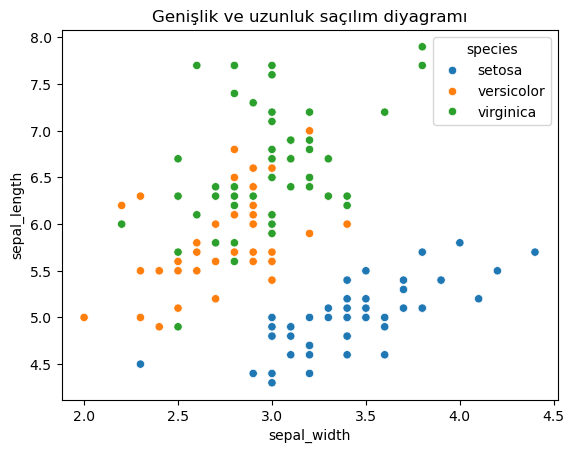

In [30]:
sns.scatterplot(x=df["sepal_width"],y=df["sepal_length"],data=df,hue=df["species"])
plt.title("Genişlik ve uzunluk saçılım diyagramı")
plt.show()

Jointplot ile daha iyi bir görsel elde edebiliriz.

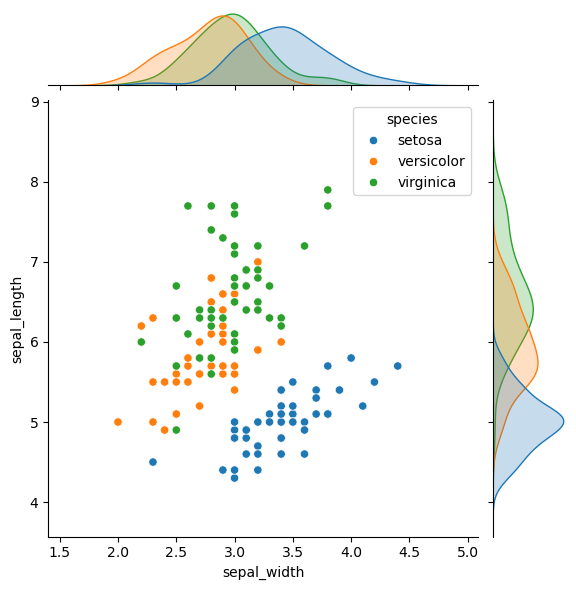

In [31]:
sns.jointplot(x=df["sepal_width"],y=df["sepal_length"],data=df,hue=df["species"])
plt.show()

Aynı grafiği yoğunluk grafiği şeklinde de çizdirebiliriz.Bunun için kind="kde" parametresi eklemek yeterli.

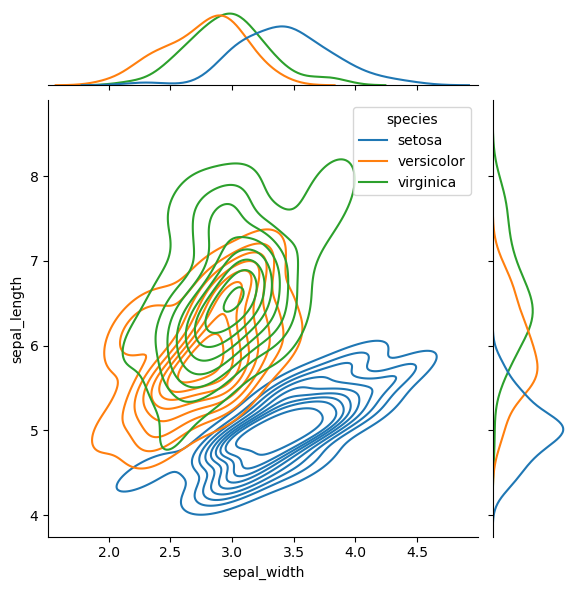

In [32]:
sns.jointplot(x=df["sepal_width"],y=df["sepal_length"],data=df,hue=df["species"],kind="kde")
plt.show()

Veya histogram şeklinde de çizdirebiliriz.

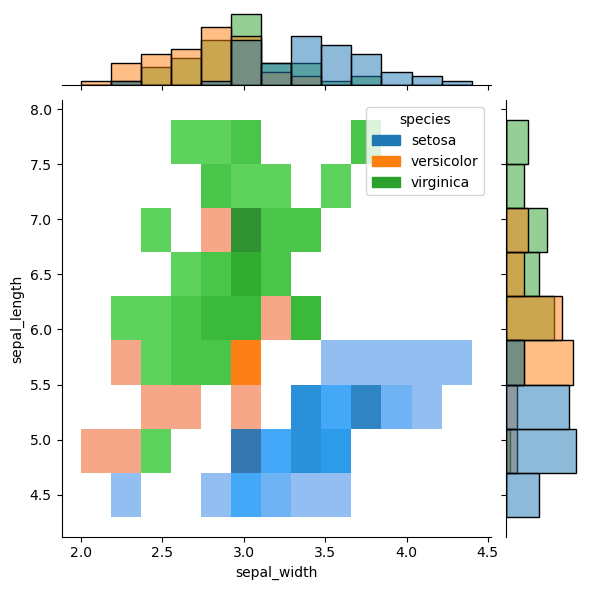

In [33]:
sns.jointplot(x=df["sepal_width"],y=df["sepal_length"],data=df,hue=df["species"],kind="hist")
plt.show()

Keman-Kelebek grafiği ile bir öznitelikteki değerlerin nerede yoğunlaştığına bakalım.

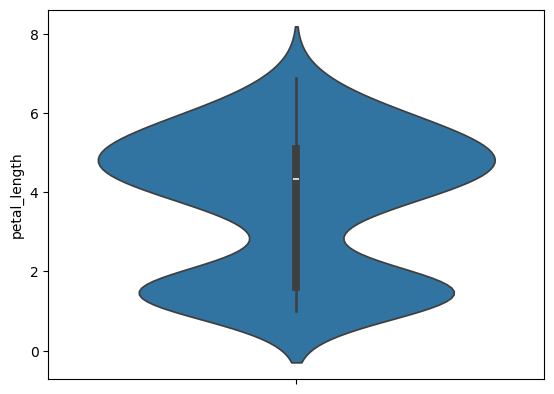

In [34]:
sns.violinplot(y="petal_length",data=df)
plt.show()

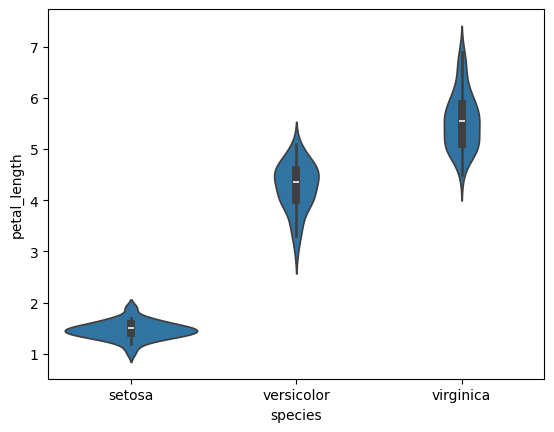

In [35]:
sns.violinplot(x=df["species"],y=df["petal_length"],data=df)
plt.show()

Hangi çiçek türünden kaç tane veri barındırıyor öğrenelim.

Toplam veri sayımız 150 idi.Böylece grafikten de anlaşılacağı gibi her bir türden 50 tane olduğunu görüyoruz.

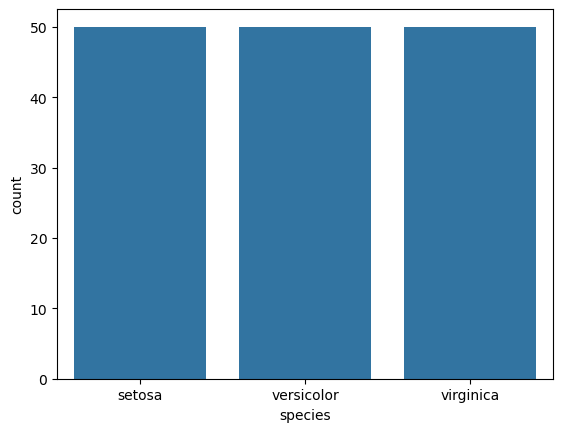

In [36]:
sns.countplot(x=df["species"],data=df);
plt.show()

petal uzunluğu ile genişliği arasındaki orantıyı bir regresyon doğrusuyla görelim.

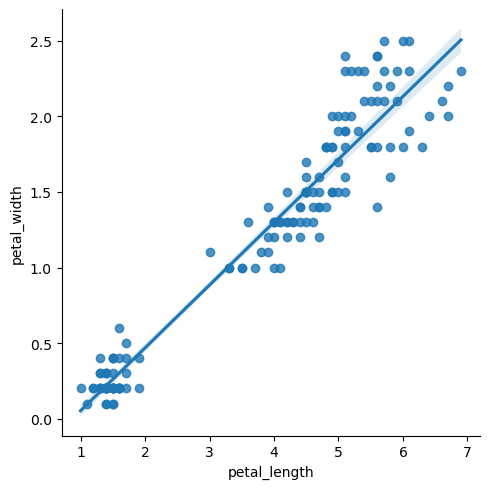

In [37]:
sns.lmplot(data=df, x="petal_length", y="petal_width") #lmplotun söz diziminde x ve y argumanını yazarken df[""] şeklinde yazmacaksın.Bazı fonksiyonlarda böyle neden anlamadım.
plt.show()